En este Notebook  vamos a explorar un poco los conceptos de aleatoreidad y probabilidad en Python

# Importamos lo necesario

In [18]:
import numpy as np
from math import sqrt
from matplotlib import pylab as plt

In [21]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "03_PROB"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Aleatoriedad

La aleatoredidad es un concepto central de la teoría de probabilidad. En general, la aleatoredidad viene asociada con la incetidumbre, que puede surgir por los errores de los datos o por los tamaños finitos de las muestras.

En la computadora, la aleatoreidad se simula usando como base un generador de números pseudo aleatorios (GNPA). Un GNPA genera una serie de números cuyas propiedades son similares a las de una serie de números aleatorios.

En python muchas de las funciones relacionadas están implementadas en el módulo random, pero una implementación más práctica aparece en el paquete numpy

https://numpy.org/doc/stable/reference/random/index.html

In [2]:
from numpy import random

Podemos generar un numero al azar entre 0 y 1 facilmente

https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

In [3]:
random.rand()

0.712259887249592

Si corren la celda de arriba muchas veces, el resultado obtenido es diferente, pero siempre un número entre 0 y 1. Pero en realidad, los GNPA utilizan algoritmos, cuyas propiedades estás perfectamente definidas por el valor inicial (la semilla, o <em>seed</em>). Por lo tanto, no son realmente aleatorios.

In [4]:
#A igual semilla igual numero aleatorio generado

random.seed(1234)
print(random.rand())

random.seed(1234)
print(random.rand())

0.1915194503788923
0.1915194503788923


Una característica práctica de la implementación en <tt>numpy</tt> es que se puede generar <tt>arrays</tt> de números aleatorios, pasándole el tamaño en cada dimensión. Esto puede ahorrarnos bastante tiempo

In [5]:
#Fijo el valor de la semilla
random.seed(1234)

print('Un array de 5x1')
print(random.rand(5,))

print('Un array de 3x2')
print(random.rand(3,2))

Un array de 5x1
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]
Un array de 3x2
[[0.27259261 0.27646426]
 [0.80187218 0.95813935]
 [0.87593263 0.35781727]]


Y por supuesto, si vuelvo a la misma semilla, los resultado son idénticos.

In [6]:
#Identica semilla, identico resultado
random.seed(1234)

print('Un array de 5x1')
print(random.rand(5,))

print('Un array de 3x2')
print(random.rand(3,2))

Un array de 5x1
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]
Un array de 3x2
[[0.27259261 0.27646426]
 [0.80187218 0.95813935]
 [0.87593263 0.35781727]]


Como se puede ver arriba, para una semilla dada, la serie de números generada es idéntica. En la actualidad, fijar el <em>seed</em> de la manera que aparece arriba se considera mala práctica, y la sugerencia es hacer lo siguiente:

In [7]:
from numpy.random import RandomState, SeedSequence
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))

# Later, you want to restart the stream
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))

[0.12038356 0.40370142 0.87770263 0.9565788  0.42646002]
[0.12038356 0.40370142 0.87770263 0.9565788  0.42646002]


De esta manera, se puede tener generadores independientes, inicializados de manera diferente, cosa que no podía hacerse antes.


# Probabilidad

Pero... que significa que `numpy.random.rand()` genere numeros al azar entre [0, 1)?

La variable aleatoria $x$ sigue una distribucion **uniforme** en [0.0, 1.0).

Podemos caracterizar una distribucion uniforme en [a,b) definiendo su densidad de probabilidad como:

$p(x)=\frac{1}{b-a}$ si $a \leq x < b$

$p(x)=0$ si $a > x$ o $ b \leq x$


Como comprobamos que $x$ sigue una distribuccion uniforme?

Bueno, podemos generar N tiradas y aprovechar que tenemos N variables independientes identicamente distribuidas para obtener los momentos de $x$. Si los momentos son los de la distribucion uniforme, gane.

Calculemos para N = 10 la media y la desviacion estandar de $x$, puede hacerlo a mano o utilizando `np.mean` y `np.std` y comparen con los resultados esperados sabiendo que

$\mu = \int p(x)x dx = \int_{a}^{b}\frac{x}{b-a}dx=\frac{b^{2}-a^{2}}{2(b-a)}=\frac{b+a}{2}$

$\sigma^{2}=\int p(x)(x-\mu)^{2}dx = \frac{1}{b-a}\int_{a}^{b}(x-\frac{a+b}{2})^{2}dx = \frac{1}{b-a}\int_{-(b-a)/2}^{(b-a)/2}u^{2}du=\frac{(b-a)^{2}}{12}$


Notese que estamos haciendo la aproximacion

$\mu \approx \frac{1}{N}\sum_{n=1}^{N}x_{n}$

$\sigma^{2} \approx \frac{1}{N}\sum_{n=1}^{N}(x_{n}-\mu)^{2}$


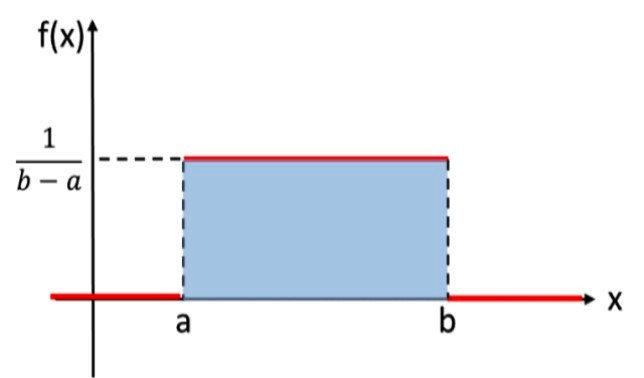

## Ejercicio

### Tirada N=10

In [8]:
#Genero una tirada de 10 numeros

N=10
n_10 = np.random.rand(N)
n_10

array([0.50099513, 0.68346294, 0.71270203, 0.37025075, 0.56119619,
       0.50308317, 0.01376845, 0.77282662, 0.88264119, 0.36488598])

In [9]:
#Media de la tirada de 10 numeros

media_n10 = np.mean(n_10)
media_n10

0.536581243958287

In [10]:
#Media esperada

media_esperada= (1 + 0) / 2
media_esperada

0.5

In [11]:
diferencia_media_n10 = media_n10 - media_esperada
diferencia_media_n10

0.03658124395828699

Los valores de la media son cercanos

In [12]:
#Desvio estandar de la tirada de 10 numeros

desvio_estandar_n10 = np.std(n_10)
desvio_estandar_n10

0.236988359833434

In [13]:
#Desvio estandar esperado

desvio_estandar_esperado = sqrt(((1-0)**2) / 12)
desvio_estandar_esperado

0.28867513459481287

In [14]:
diferencia_desvio_estandar_n10 = desvio_estandar_n10 - desvio_estandar_esperado
diferencia_desvio_estandar_n10

-0.05168677476137887

Los valores del desvio estandar son cercanos

Realizo el grafico de los valores obtenidos

Saving figure dist_uniforme_N10


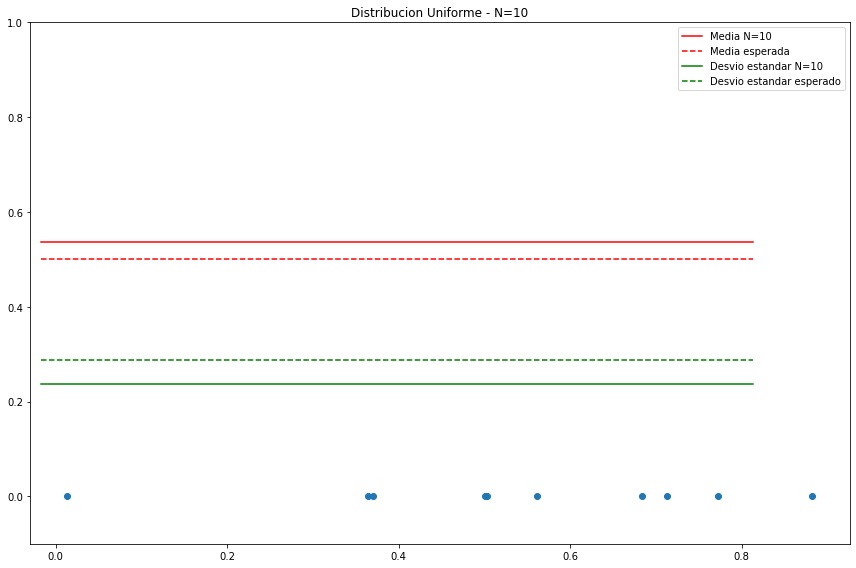

In [22]:
y = np.full((10,),0) #Vector de 0 para el eje y
x = n_10 #

plt.figure(figsize=(12,8))
plt.title('Distribucion Uniforme - N=10')
plt.ylim([-0.1,1])

#Lineas horizontales para la media
plt.axhline(y=media_n10,xmin=np.min(n_10),xmax=np.max(n_10),color='r',label='Media N=10')
plt.axhline(y=media_esperada,xmin=np.min(n_10),xmax=np.max(n_10),color='r',ls='--',label='Media esperada')

#Lineas horizontales para el desvio estandar
plt.axhline(y=desvio_estandar_n10,xmin=np.min(n_10),xmax=np.max(n_10),color='g',label='Desvio estandar N=10')
plt.axhline(y=desvio_estandar_esperado,xmin=np.min(n_10),xmax=np.max(n_10),color='g',ls='--',label='Desvio estandar esperado')

#Scatter de puntos para los valores aleatorios obtenidos (sobre un eje horizontal)
plt.scatter(x,y)

plt.legend()

save_fig("dist_uniforme_N10")

### Tirada N=10000

In [23]:
N=10000
n_10000 = np.random.rand(N)

In [24]:
#Media de la tirada de 10000 numeros

media_n10000 = np.mean(n_10000)
media_n10000

0.49974785823722595

In [25]:
diferencia_media_n10000 = media_n10000 - media_esperada
diferencia_media_n10000

-0.00025214176277404965

Los valores de la media son cercanos y mejoran al crecer N

In [26]:
#Desvio estandar de la tirada de 10 numeros

desvio_estandar_n10000 = np.std(n_10000)
desvio_estandar_n10000

0.2898250721895516

In [27]:
diferencia_desvio_estandar_n10000 = desvio_estandar_n10000 - desviacion_estandar_esperado
diferencia_desvio_estandar_n10000

NameError: name 'desviacion_estandar_esperado' is not defined

Los valores del desvio estandar son cercanos y mejoran al crecer N

Saving figure dist_uniforme_N10000


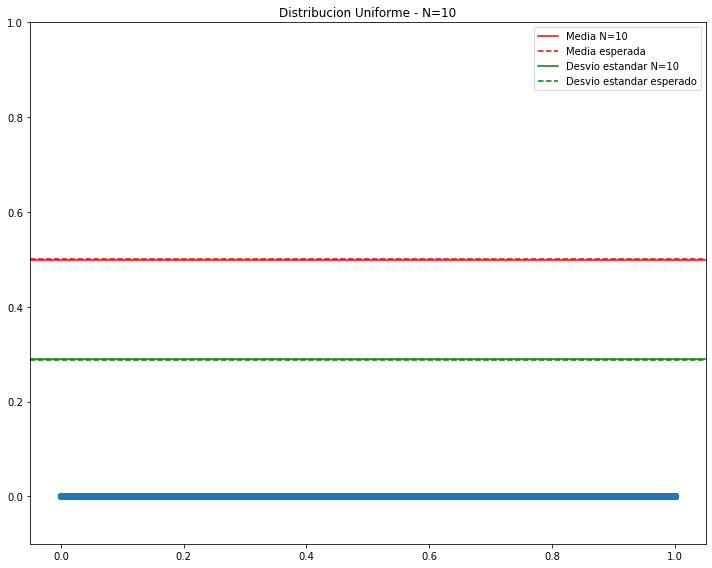

In [29]:
y = np.full((10000,),0) #Vector de 0 para el eje y
x = n_10000 

plt.figure(figsize=(10,8))
plt.title('Distribucion Uniforme - N=10')
plt.ylim([-0.1,1])

#Lineas horizontales para la media
plt.axhline(y=media_n10000,xmin=np.min(n_10000),xmax=np.max(n_10000),color='r',label='Media N=10')
plt.axhline(y=media_esperada,xmin=np.min(n_10000),xmax=np.max(n_10000),color='r',ls='--',label='Media esperada')

#Lineas horizontales para el desvio estandar
plt.axhline(y=desvio_estandar_n10000,xmin=np.min(n_10000),xmax=np.max(n_10000),color='g',label='Desvio estandar N=10')
plt.axhline(y=desvio_estandar_esperado,xmin=np.min(n_10000),xmax=np.max(n_10000),color='g',ls='--',label='Desvio estandar esperado')

#Scatter de puntos para los valores aleatorios obtenidos (sobre un eje horizontal)
plt.scatter(x,y)

plt.legend()
save_fig("dist_uniforme_N10000")

In [30]:
#Resolucion del ejercicio por parte del Profesor (Manuel)

N=10
a=0.0
b=1.0
media_esperada=(a+b)*0.5
desviacion_estandar_esperada=(b-a)/np.sqrt(12)
print(media_esperada,desviacion_estandar_esperada)

experimentos=random.rand(N)
print(np.mean(experimentos),np.std(experimentos,ddof=1))

0.5 0.2886751345948129
0.6295038420842324 0.30545426971523093


### Seguimos

Que esta pasando?

En efecto,  los estimadores no dan exactamente lo que esperamos. Como mejorar esto?

Probemos con N = 10000

In [31]:
N=10000
experimentos=random.rand(N)
print(np.mean(experimentos),np.std(experimentos))

0.5006838341369362 0.29022477972517874


Mucho mas cerca...

Ahora, grafiquen la media y la desviacion estandar en funcion de N, para de N = 10, 100, 1000, 10000, 100000, 1000000

In [32]:
lista_medias = []
lista_desvios_estandar = []
repeticiones = [10,100,1000,10000,100000,1000000]

for i in repeticiones:
    lista_numeros = np.random.rand(i)
    
    media = np.mean(lista_numeros)
    lista_medias.append(media)
    
    desvio = np.std(lista_numeros)
    lista_desvios_estandar.append(desvio)

Saving figure dist_uniforme_media


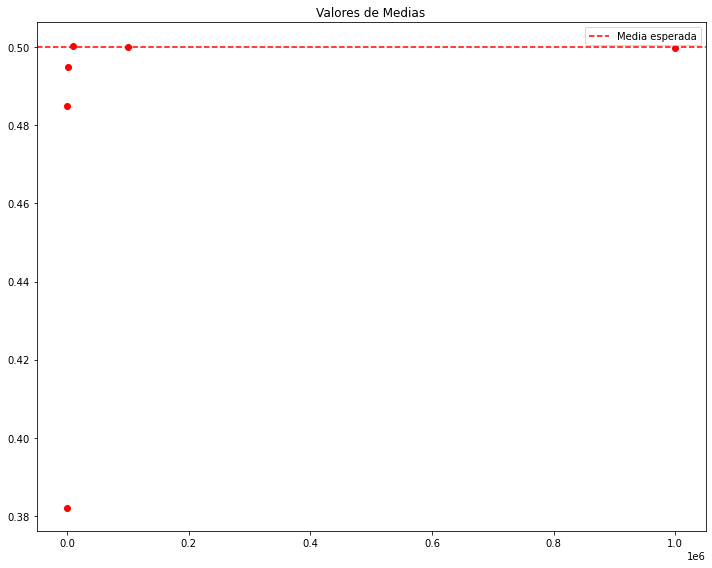

In [40]:
#Grafico de medias

plt.figure(figsize=(10,8))
plt.title('Valores de Medias')
plt.axhline(y=media_esperada,xmin=np.min(n_10000),xmax=np.max(n_10000),color='r',ls='--',label='Media esperada')
plt.scatter(repeticiones,lista_medias,c='r')
plt.legend()

save_fig("dist_uniforme_media")

Saving figure dist_uniforme_desvio_estandar


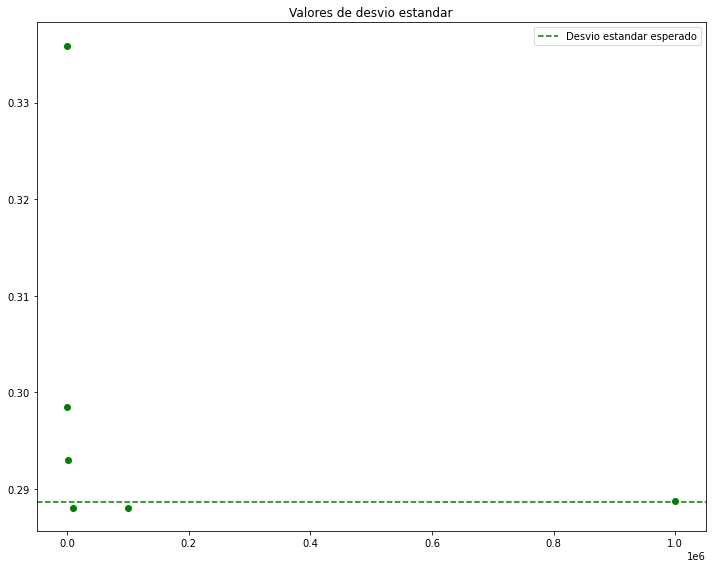

In [41]:
#Grafico de desvios estandar

plt.figure(figsize=(10,8))
plt.title('Valores de desvio estandar')
plt.axhline(y=desvio_estandar_esperado,xmin=np.min(n_10000),xmax=np.max(n_10000),color='g',ls='--',label='Desvio estandar esperado')
plt.scatter(repeticiones,lista_desvios_estandar,c='g')
plt.legend()

save_fig("dist_uniforme_desvio_estandar")

En ambos casos se observa que al aumentar el valor de N el valor de la media y el desvio estandar tienen al valor esperado

In [39]:
#Resolucion del ejercicio por parte del Profesor (Manuel)

N=1000000
experimentos=random.rand(N)
medias=[]
desviaciones=[]
for m in [10,100,1000,10000,100000,1000000]:
  medias.append(np.mean(experimentos[:m]))
  desviaciones.append(np.std(experimentos[:m]))

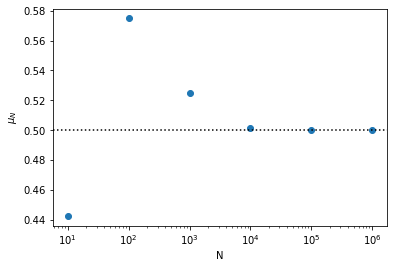

Saving figure dist_uniforme_media_profesor
Saving figure dist_uniforme_desvio_estandar_profesor


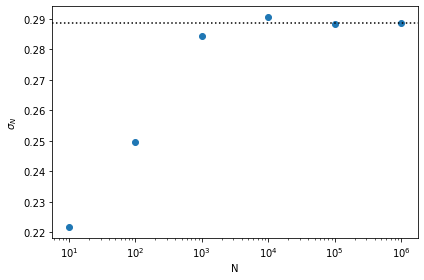

In [42]:
plt.scatter([10,100,1000,10000,100000,1000000],medias)
plt.axhline(media_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\mu_{N}$')
plt.show()
save_fig("dist_uniforme_media_profesor")


plt.scatter([10,100,1000,10000,100000,1000000],desviaciones)
plt.axhline(desviacion_estandar_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\sigma_{N}$')
save_fig("dist_uniforme_desvio_estandar_profesor")

### Seguimos

Ademas de comparar momentos, podemos visualizar las mediciones. Una opcion es usar un box plot, donde se muestran los cuantiles de los datos

<ipython-input-44-9e70cbf66bc6>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Saving figure dist_uniforme_boxplot


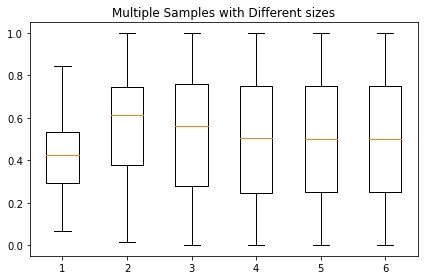

In [44]:
from matplotlib.pyplot import boxplot

data = [experimentos[:m] for m in [10,100,1000,10000,100000,1000000]] #En una lista almaceno listas con los valores para cada experimento
fig, ax = plt.subplots()
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(data)
fig.show()
save_fig("dist_uniforme_boxplot")

Nuevamente se observa que a medida que aumenta N la forma del boxplot es la misma con igual mediana

La opcion que vamos a preferir en la materia es utilizar histogramas.

Los histogramas separan el rango de variable aleatoria en M bines. Luego, cuentan cuantos eventos caen en cada bin. Al hacer los histogramas, suele ser mas seguro definir los bines de antemano. Por ejemplo, con `np.linspace` o `np.range`.


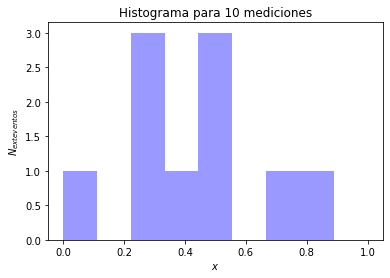

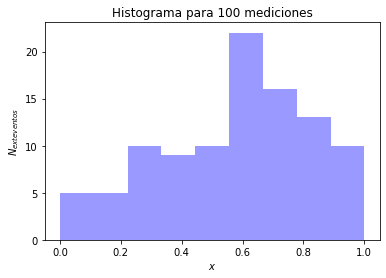

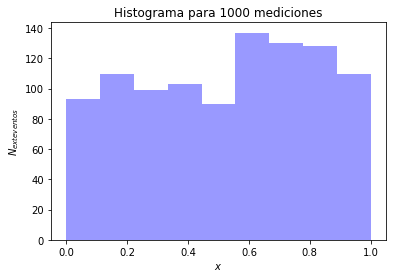

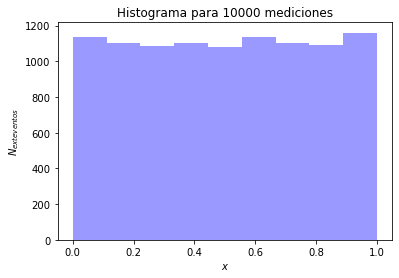

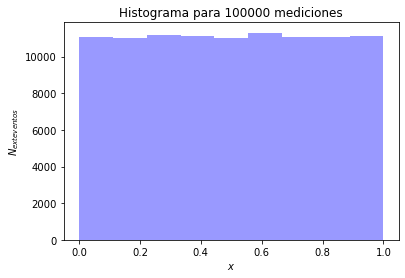

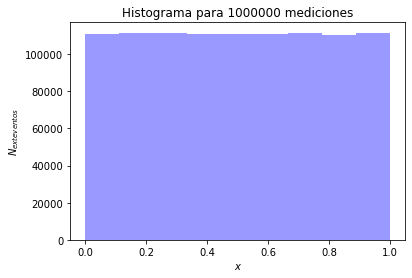

In [46]:
bins=np.linspace(0.0,1.0,10) #Defino los bins por medio de linspace.

#Para cada lista generada anteriormente realizo un grafico
for dato in data:
  plt.hist(dato,bins=bins,color='blue',alpha=0.4)
  plt.xlabel('$x$')
  plt.ylabel('$N_{\text{eventos}}$')
  plt.title('Histograma para '+str(len(dato))+' mediciones')
  plt.show()

Nuevamente se observa que a medida que aumenta el valor de N la distribucion de los valores toma forma uniforme

Podemos normalizar los histogramas para que la suma de todos los conteos de 1. Una ventaja de esto es que podemos comparar con la distribucion de probabilidad.

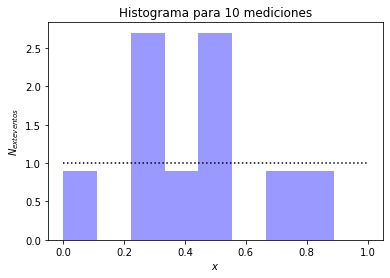

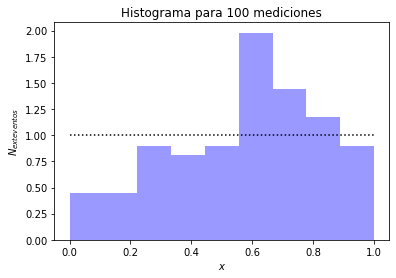

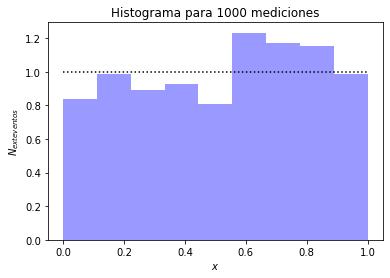

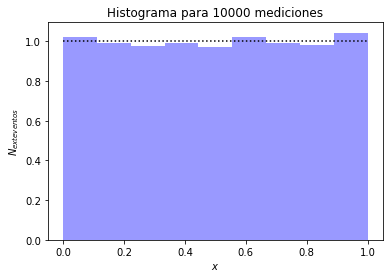

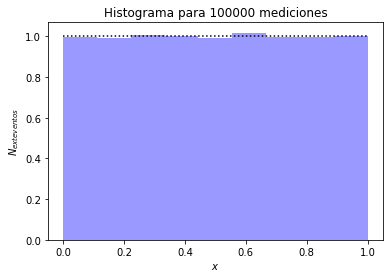

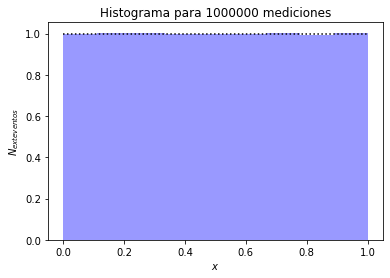

In [47]:
a=0.0
b=1.0

bins=np.linspace(0.0,1.0,10)
for dato in data:
  plt.hist(dato,bins=bins,color='blue',alpha=0.4,density='True')
  plt.plot(bins,[(1.0/(b-a)) for i in range(len(bins))], color='black', linestyle='dotted')
  plt.xlabel('$x$')
  plt.ylabel('$N_{\text{eventos}}$')
  plt.title('Histograma para '+str(len(dato))+' mediciones')
  plt.show()

Noten que p(x)>1.0 para algunos bines. Esto no es errado por que estamos con una pdf, no una pmf, aunque los bines sean discretos. Otra diferencia entre pdf y pmf es que, si sumamos:

9.0


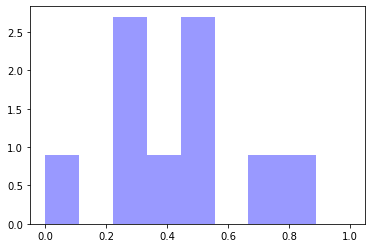

In [48]:
binned_data, hist_bins, pp = plt.hist(data[0],bins=bins,color='blue',alpha=0.4,density='True')
print(np.sum(binned_data))

No da 1! Eso es porque falto incluir el bineado (multiplicar por el ancho del bin)

In [49]:
np.sum(binned_data*(hist_bins[1]-hist_bins[0]))

0.9999999999999998

Esto no sucede para variables discretas, es una consecuencia de discretizar una variable continua y aproximar

$\int f(x)p(x)dx \approx \sum_{i=1}^{M}f(x_{i})p(x_{i})\Delta_{i}$

## Otras distribuciones

En la vida, y casi siempre, las variables  no siguen distribuciones uniformes. Como bien ejemplifico Rodrigo en clase, tenemos otras distribuciones tipicas. Por suerte, la gran mayoria de ellas estan implementadas en `scipy.stats`

In [50]:
from scipy.stats import norm, beta, bernoulli, binom, multinomial,multivariate_normal, poisson, gamma #etc

Para variar un poco vayamos a alguna variable aleatoria discreta. Por ejemplo, la cantidad $k$ de veces que una moneda cargada con probabilidad $p$ sale cara (1) si la tiramos $N$ veces. Cada tirada sigue una distribucion de Bernoulli pero tambien podemos consiguerar la Binomial con $k$ exitos en $N$ tiradas, dado que son equivalentes.

Los parametros de la distribucion que sigue la variable aleatoria $k$ son $N$ y $p$. Entonces, podemos definir una distribucion especifica como

In [51]:
N=10 #Cantidad de repeticiones
p=0.6 #Probabilidad de exito (sale cara)
mi_binomial=binom(p=p,n=N)

$k$ puede tomar valores 0, 1, 2, ... ,10.

In [52]:
k_values=np.arange(0,11,1)
print(k_values)

[ 0  1  2  3  4  5  6  7  8  9 10]


Podemos ver la probabilidad de cada $k$ utilizando el metodo `pmf` (Probability mass function)

In [53]:
for k in k_values:
  print(k,mi_binomial.pmf(k))

0 0.00010485760000000014
1 0.0015728640000000028
2 0.010616832
3 0.04246732800000004
4 0.11147673600000013
5 0.20065812480000034
6 0.2508226560000002
7 0.21499084800000012
8 0.12093235199999994
9 0.04031078400000004
10 0.0060466176


Obviamente, es mas lindo graficarlo. Gracias a numpy, todo se lee intuitivamente

Saving figure dist_binomial


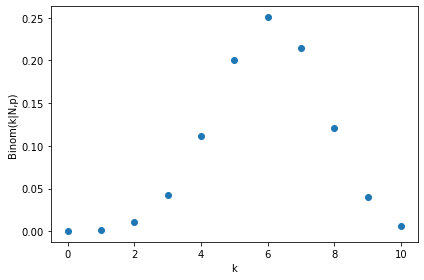

In [54]:
k_probs=mi_binomial.pmf(k_values)
plt.scatter(k_values,k_probs)
plt.xlabel('k')
plt.ylabel('Binom(k|N,p)')
save_fig("dist_binomial")

Comprobemos la normalizacion!

In [55]:
print(np.sum(k_probs))

1.0000000000000007


Podemos generar datos a partir de esta distribucion utilizando el metodo `rvs` (Random variates). Que son estos datos?

In [56]:
Nexp=1000000
tiradas = mi_binomial.rvs(Nexp)

Repitamos lo que hicimos con la uniforme, calculemos los momentos sabiendo que

$\mu = \sum_{k=0}^{N}k\cdot p(k|N,p)=N\cdot p$

$\sigma^{2} = N\cdot p\cdot (1-p)$

Donde aca la sumatoria es exacta y no una aproximacion.

In [57]:
media_esperada=N*p
desviacion_estandar_esperada=np.sqrt(N*p*(1-p))
print(media_esperada,desviacion_estandar_esperada)

6.0 1.5491933384829668


### Ejercicio

In [58]:
medias=[]
desviaciones=[]
for m in [10,100,1000,10000,100000,1000000]:
  medias.append(np.mean(tiradas[:m]))
  desviaciones.append(np.std(tiradas[:m]))

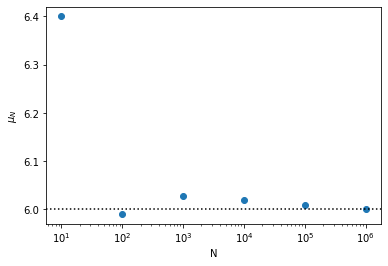

Saving figure binomial_media_esperada
Saving figure binomial_desvio_estandar_esperado


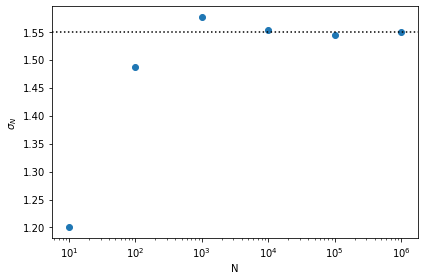

In [59]:
plt.scatter([10,100,1000,10000,100000,1000000],medias)
plt.axhline(media_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\mu_{N}$')
plt.show()
save_fig("binomial_media_esperada")


plt.scatter([10,100,1000,10000,100000,1000000],desviaciones)
plt.axhline(desviacion_estandar_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\sigma_{N}$')
save_fig("binomial_desvio_estandar_esperado")

### Seguimos

Vamos con la Gaussiana, o distribucion Normal, $\mathcal{N}(x|\mu,\sigma^{2})$

In [60]:
mu=15.0
sigma=2.0
mi_gaussiana=norm(loc=mu,scale=sigma)

Si queremos graficar la pdf de la gaussiana, podemos usar el metodo `pdf` (	Probability density function)

Saving figure distribucion_normal


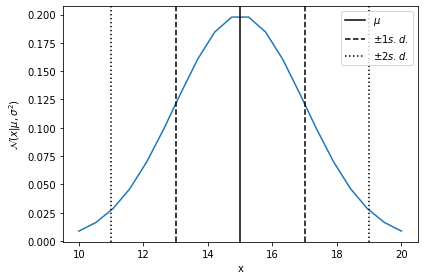

In [61]:
# valores posibles
x = np.linspace(10.0,20.0,20)
plt.plot(x,mi_gaussiana.pdf(x))
plt.axvline(mu,color='black',linestyle='solid',label='$\mu$')
plt.axvline(mu-sigma,color='black',linestyle='dashed',label='$\pm 1 s.d.$')
plt.axvline(mu+sigma,color='black',linestyle='dashed')
plt.axvline(mu-2.0*sigma,color='black',linestyle='dotted',label='$\pm 2 s.d.$')
plt.axvline(mu+2.0*sigma,color='black',linestyle='dotted')
plt.xlabel('x')
plt.legend(loc='upper right')
plt.ylabel('$\mathcal{N}(x|\mu,\sigma^{2})$')
save_fig("distribucion_normal")

Si queremos generar datos a partir de la gaussiana, nuevamente tenemos el metodo `rvs` (Random variates)

In [156]:
Nexp=1000000
mediciones=mi_gaussiana.rvs(Nexp)

Y podemos hacer lo mismo que antes

## Teorema Central del Limite

Con lo que vimos ya podemos ejemplificar un poco el teorema central del limite.

Comparemos una Binomial con p=0.6 y N yendo a infinito con una Gaussiana. La Gaussiana tendra siempre media $N\cdot p$ y desviacion estandar $\sqrt{N\cdot p\cdot (1-p)}$

Noten que aca el limite no es el numero de experimentos sino en el numero de tiradas por experimento. Sin embargo, para tener datos representativos necesitamos muchos experimentos.

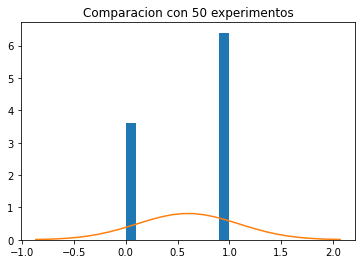

Saving figure Comparacion con 50 experimentos


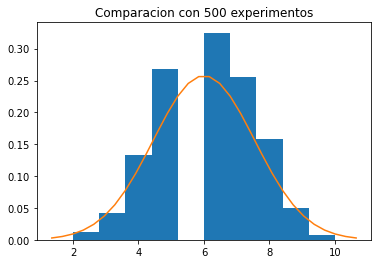

Saving figure Comparacion con 500 experimentos


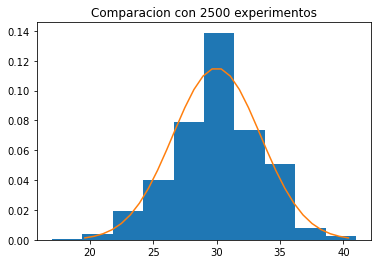

Saving figure Comparacion con 2500 experimentos


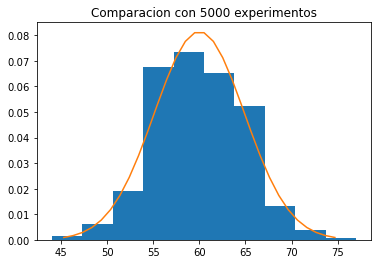

Saving figure Comparacion con 5000 experimentos


<Figure size 432x288 with 0 Axes>

In [70]:
p = 0.6
N=[1,10,50,100]
for n in N:
  data=binom(p=p,n=n).rvs(50*n)
  a, b, c = plt.hist(data,density='True')
  mu=n*p
  sigma=np.sqrt(n*p*(1-p))
  x=np.linspace(mu-3*sigma,mu+3*sigma,30)
  plt.plot(x,norm(loc=mu,scale=sigma).pdf(x))
  plt.title('Comparacion con '+str(50*n)+' experimentos')
  plt.show()

Como era de esperar al aumentar el numero de tirada por experimiento la distribucion se "parece" mas a una distribucion normal

## Graficos 2d

Hasta ahora solo vimos distribuciones unidimensionales. La distribucion bidimensional que mas nos interesa es, como no, una gaussiana.

Ahora tenemos $\vec{\mu}=(\mu_{1},\mu_{2})^{T}$ y $\Sigma$ una matriz de 2x2

In [63]:
mu = [1.0, -1.0]
sigma=[[0.1,0.01],[0.01,0.1]]
mi_gaussiana_2d=multivariate_normal(mean=mu,cov=sigma)

Para graficar en 2d tenemos un par de opciones. Podemos generar datos y hacer un histograma 2d. Mientras mas dimensiones tiene un histograma, mas datos necesitamos para que sea representativo.

In [64]:
datos=mi_gaussiana_2d.rvs(1000)

In [65]:
datos.shape

(1000, 2)

Definir los bins puede ser feo... Jueguen un poco y compruebenlo por ustedes mismos

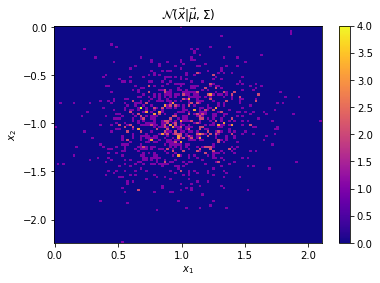

Saving figure distribucion_normal2d


<Figure size 432x288 with 0 Axes>

In [71]:
plt.hist2d(datos[:,0],datos[:,1],bins=[100,100],cmap='plasma')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title(r'$\mathcal{N}(\vec{x}|\vec{\mu},\Sigma)$')
plt.colorbar()
plt.show()
save_fig("distribucion_normal2d")

Uno aca puede marginalizar sumando sobre alguna direccion

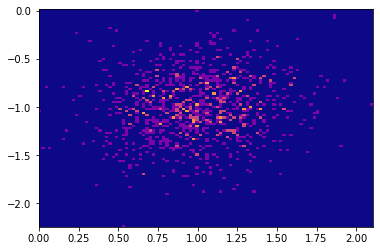

In [73]:
h, xedges, yedges, image = plt.hist2d(datos[:,0],datos[:,1],bins=[100,100],cmap='plasma',density='True')

In [74]:
x1d=np.sum(h,axis=1)*(yedges[1]-yedges[0])
x2d=np.sum(h,axis=0)*(xedges[1]-xedges[0])

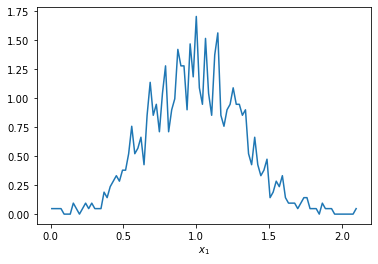

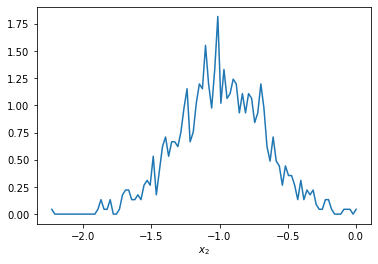

In [75]:
plt.plot([0.5*(xedges[i+1]+xedges[i]) for i in range(h.shape[0])],x1d)
plt.xlabel('$x_{1}$')
plt.show()
plt.plot([0.5*(yedges[i+1]+yedges[i]) for i in range(h.shape[1])],x2d)
plt.xlabel('$x_{2}$')
plt.show()

In [76]:
np.sum(h)*(xedges[1]-xedges[0])*(yedges[1]-yedges[0])

1.000000000000004

Otra opcion  es utilizar el metodo 'pdf' y hacer un 'contourplot'

In [77]:
x1=np.linspace(0.0,2.0,10)
x2=np.linspace(-2.0,0.0,5)
X1, X2 = np.meshgrid(x1,x2)

In [78]:
print(X1.shape,X2.shape)

(5, 10) (5, 10)


In [79]:
pos=np.dstack((X1, X2))
print(pos.shape)
Z=mi_gaussiana_2d.pdf(pos)
print(Z.shape)

(5, 10, 2)
(5, 10)


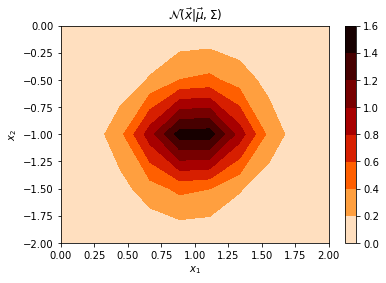

In [80]:
plt.contourf(X1,X2,Z,cmap='gist_heat_r')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title(r'$\mathcal{N}(\vec{x}|\vec{\mu},\Sigma)$')
plt.colorbar()

Y podemos superponer ambos plots

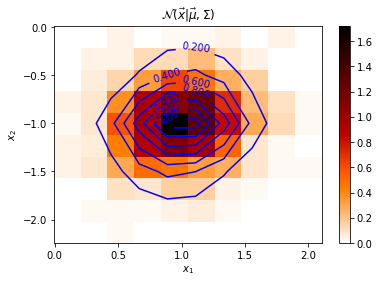

In [81]:
plt.hist2d(datos[:,0],datos[:,1],bins=[10,10],density='True',cmap='gist_heat_r')
plt.colorbar()
pdfplot=plt.contour(X1,X2,Z,colors='blue')
plt.clabel(pdfplot, inline=1, fontsize=10)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title(r'$\mathcal{N}(\vec{x}|\vec{\mu},\Sigma)$')
plt.show()

# Un lindo ejercicio si hay tiempo

Una enfermedad genética rara afecta al 0.1% de la población de un país. Para diagnosticarla, existe un análisis clínico que detecta la enfermedad en el 99% de los casos en los que el paciente la padece, y tiene un 1% de falsos positivos.

Un paciente recibe un resultado positivo del análisis clínico.

¿Qué probabilidad hay de que la persona padezca la enfermedad?

Defino lo siguiente:

    E: Enfermo
    S: Sano
    B: Dar + en la prueba

Segun la descripcion del problema sobre la afectacion de una persona a la enfermedad:

    P(E) = 0.001 (probabilidad de estar enfermo del 0.1%)
    P(S) = 1- P(E) = 1 - 0.001 = 0.999 (probabilidad de estar sano)
    
Segun la descripcion del problema sobre las bondades del test:

    P(B/E) = 0.99 (probabilidad de dar + en el test tal que se esta enfermo) 
    P(B/S) = 0.01 (probabilidad de dar + en el test tal que no se esta enfermo) 

Tengo que calcular:
    
    P(E/B) = Probabilidad de estar enfermo tal que dio + el test

Por Bayes tengo que:

    P(E/B) = [P(B/E) * P(E)] / P(B)
    
donde P(B) lo calculo por medio de la probabilidad total:

    P(B) = P(B/E) * P(E) + P(B/S) * P(S)

Realizando el calculo tenemos:

    P(E/B) = 0.99 * 0.001 / [0.99 * 0.001 + 0.01 * 0.999]
    
    P(E/B) = 0.09 = Probabilidad de estar enfermo tal que dio + el test